In [1]:
import argparse
import os
path = os.getcwd()
path=path[:path.find('estimate-innovation')+20]
# No = (os.path.basename(__file__))[-4]
No = "0" # notebook用
# print('実験No.'+No)
import warnings
warnings.simplefilter('ignore')# 警告を非表示
import numpy as np
np.set_printoptions(precision=4, floatmode='fixed', suppress=True)
import matplotlib.pyplot as plt
from scipy import stats
import math
import sys
sys.path.append(path)
import random
import time
import statsmodels.api as sm
from scipy.stats import norm
import japanize_matplotlib
from scipy.stats import gaussian_kde

import torchvision.transforms as transforms
from torchvision.utils import save_image

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable
# 人工データを生成してくれる機械が置いてあるところ
import tsModel
# 学習用のニューラルネットが置いてあるところ
import models
# p-Wasserstein距離の関数
import Wasserstein
path

'/home/lab/ryuichi/Documents/research/estimate-innovation/'

### 非線形ARモデルに従う時系列の作成

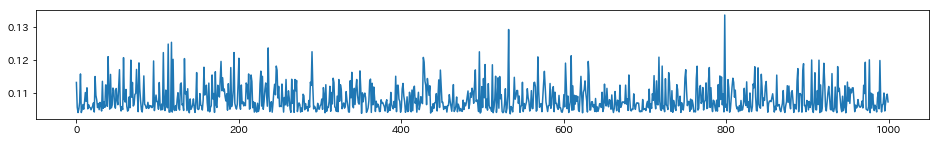

In [70]:
phi_a = [1.0, -0.5, 0.7, -0.4] ; phi_b = [0]
p = len(phi_a) ; q = len(phi_b)
dataSeed=9
N = 1000
data = tsModel.NeuralNet(p=p, q=0, model_random_seed=8, random_seed=dataSeed, n_unit=[16,16,16,16], N=N)
NNmodel = tsModel.NeuralNet(p=p, q=0, model_random_seed=8, random_seed=dataSeed, return_net=True, n_unit=[16,16,16,16], N=N)
inno = tsModel.NeuralNet(p=p, q=0, model_random_seed=8, random_seed=dataSeed, return_innovation=True, n_unit=[16,16,16,16], N=N)
# 描画
plt.figure(figsize=(16,2)) ; plt.plot(data) ; plt.show()
# データをGPUかCPUに乗っける
# data = torch.from_numpy(data).float().to(device)

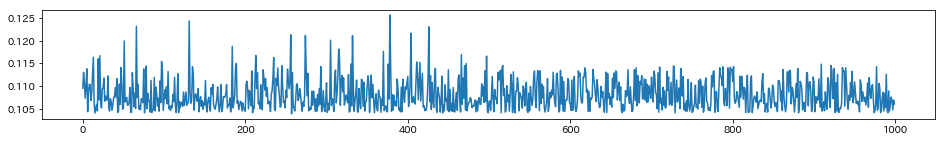

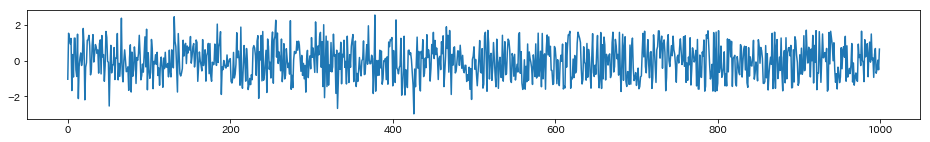

In [71]:
test= tsModel.NeuralNet(p=p, q=0, model_random_seed=8, n_unit=[16,16,16,16], random_seed=2**32-1, randomness="normal&uniform", N=1000)
test_inno = tsModel.NeuralNet(p=p, q=0, model_random_seed=8, n_unit=[16,16,16,16], random_seed=2**32-1, randomness="normal&uniform", return_innovation=True, N=1000)
plt.figure(figsize=(16,2)) ; plt.plot(test[:1500]) ; plt.show()
plt.figure(figsize=(16,2)) ; plt.plot(test_inno[:1500]) ; plt.show()

### ARモデルを学習し、残渣系列を調査する。

In [72]:
hat_p = 4

In [73]:
trainData = np.array(data)
testData = np.array(test)

In [74]:
# モデルの生成
model = sm.tsa.AR(trainData)
# 推定
result = model.fit(maxlag=hat_p)

In [75]:
# テストデータの残渣系列
params = result.params[1:]
test_estimate_inno = []
for i in range(p,N):
    test_estimate_inno.append( testData[i] - (params*np.flip(testData[i-p:i])).sum() - result.params[0])
test_estimate_inno = np.array(test_estimate_inno)

#### テストデータにおけるinnoavtionの比較

(450, 550)

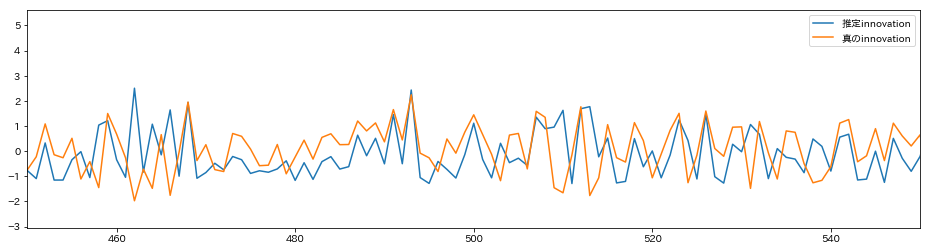

In [76]:
plt.figure(figsize=(16,4))
plt.plot(test_estimate_inno/test_estimate_inno.std(), label='推定innovation')
plt.plot(-test_inno[4:]/test_inno.std(), label='真のinnovation')
plt.legend()
plt.xlim(450,550)

割とあてにきててひく

In [77]:
NNmodel.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0876,  0.3088,  0.3993, -0.1820,  0.0123],
                      [ 0.1291,  0.3569, -0.4346,  0.0702, -0.3383],
                      [ 0.3740,  0.1615, -0.2683, -0.3469, -0.4455],
                      [ 0.3514,  0.2725, -0.2194, -0.0284, -0.2967],
                      [-0.2940,  0.0092, -0.3517,  0.0815,  0.2587],
                      [-0.3708, -0.1182, -0.0214,  0.1240, -0.0465],
                      [-0.3761, -0.1611, -0.4443, -0.0682, -0.1727],
                      [ 0.4051, -0.0482,  0.2465, -0.4355, -0.0804],
                      [ 0.3103,  0.2580,  0.1027, -0.2780,  0.2067],
                      [ 0.4098, -0.0309,  0.2432, -0.3029,  0.1775],
                      [ 0.0368,  0.3876,  0.2420,  0.4224, -0.0777],
                      [-0.0101, -0.0553, -0.0588, -0.3615, -0.3067],
                      [-0.1293, -0.3082, -0.4192, -0.2143,  0.0228],
                      [-0.4398,  0.1118,  0.4391, -0.1487, -0.2570],
      

### Change Finderを試す

In [78]:
import changefinder

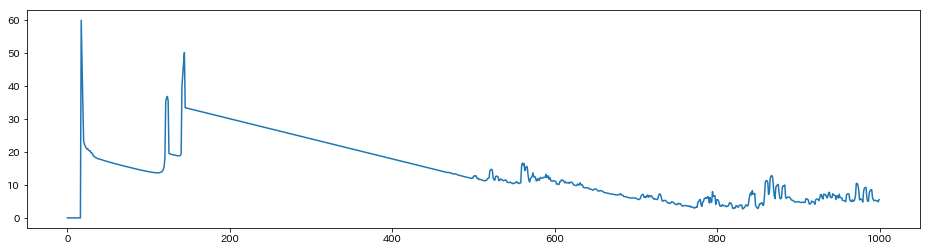

In [125]:
cf = changefinder.ChangeFinder(r=0.03, order=4, smooth=7)
result = np.empty(len(testData))
for i, d in enumerate(testData):
    result[i] = cf.update(d)
plt.figure(figsize=(16,4))
plt.plot(result)

まあだめだよね

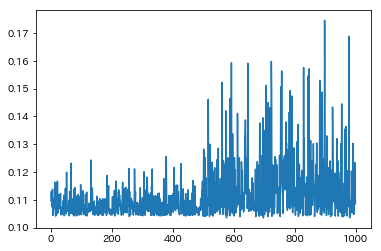

In [91]:
a = np.array(tsModel.NeuralNet(p=p, q=0, model_random_seed=8, n_unit=[16,16,16,16], random_seed=2**32-1, randomness="normal&normal", N=1000))
plt.plot(a)

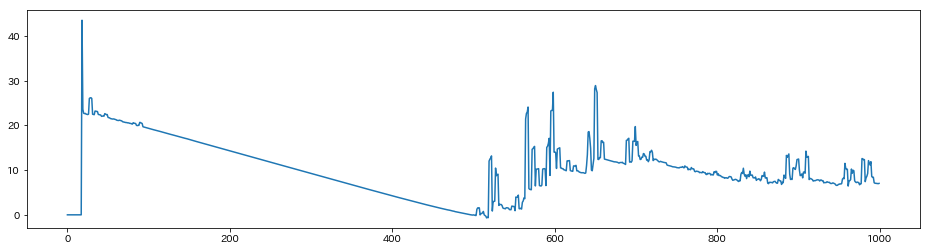

In [126]:
cf = changefinder.ChangeFinder(r=0.025, order=4, smooth=8)
result = np.empty(len(a))
for i, d in enumerate(a):
    result[i] = cf.update(d) 
plt.figure(figsize=(16,4))
plt.plot(result)